In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install librosa

In [2]:
# Orignial Notebook: https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer/blob/master/final_results_gender_test.ipynb
# This notebook author: Reza Chu
# Last Editing Date: 31st May 2019

## Python
import os
import random
import sys

import IPython
from IPython.display import Audio
from IPython.display import Image
import matplotlib.pyplot as plt

## Package
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf
py.init_notebook_mode(connected=True)

## Keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

input_duration=3
# % pylab inline

In [ ]:
#radvass speech and song
import time
import os
import librosa
from librosa import display
import matplotlib.pyplot as plt

count=0
path1 = '/content/drive/My Drive/data_set/RAVDESS_speech'
path2 = '/content/drive/My Drive/data_set/RAVDESS_song'

lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path2):
  print(dirs)
  print(subdir)
  #print(files)
  for file in files:
      try:
        count +=1
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

for subdir, dirs, files in os.walk(path1):
  print(dirs)
  print(subdir)
 # print(files)
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        
        count +=1
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue



print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

['Actor_10', 'Actor_11', 'Actor_13', 'Actor_12', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_09', 'Actor_24', 'Actor_04', 'Actor_08', 'Actor_03', 'Actor_02', 'Actor_06', 'Actor_05', 'Actor_01', 'Actor_07', 'Actor_20']
/content/drive/My Drive/data_set/RAVDESS_song
[]
/content/drive/My Drive/data_set/RAVDESS_song/Actor_10
[]
/content/drive/My Drive/data_set/RAVDESS_song/Actor_11
[]
/content/drive/My Drive/data_set/RAVDESS_song/Actor_13
[]
/content/drive/My Drive/data_set/RAVDESS_song/Actor_12
[]
/content/drive/My Drive/data_set/RAVDESS_song/Actor_14
[]
/content/drive/My Drive/data_set/RAVDESS_song/Actor_15
[]
/content/drive/My Drive/data_set/RAVDESS_song/Actor_16
[]
/content/drive/My Drive/data_set/RAVDESS_song/Actor_17
[]
/content/drive/My Drive/data_set/RAVDESS_song/Actor_18
[]
/content/drive/My Drive/data_set/RAVDESS_song/Actor_19
[]
/content/drive/My Drive/data_set/RAVDESS_song/Actor_21
[]
/content/drive/My Drive/

In [ ]:
count

In [ ]:
from numpy.core.fromnumeric import size
size(lst)

In [ ]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)

In [ ]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)
X.shape, y.shape

In [ ]:
X.shape

In [4]:
# Loading saved models
import joblib
X = joblib.load('/content/drive/My Drive/models/CNN_2/last/features/speech&songx.joblib')
y = joblib.load('/content/drive/My Drive/models/CNN_2/last/features/speech&songy.joblib')

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
#X_valid, X_test, y_valid, y_test = train_test_split(X_test,y_test, test_size=0.50, random_state=42)

In [6]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)
#= np.expand_dims(X_valid, axis=2)

In [7]:
x_traincnn.shape, x_testcnn.shape

((1961, 40, 1), (491, 40, 1))

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [9]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

model = Sequential()

model.add(Conv1D(128, 8,padding='same', #classifier.add(Convolution2D(64, (3, 3), padding = 'same', input_shape = (128, 128, 3), activation = 'relu'))
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=(5)))


model.add(Conv1D(256,8,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=(5)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(8))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(lr=0.00002)
#opt = tf.keras.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=1e-07, decay=0.0)
#opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 40, 128)           1152      
                                                                 
 activation_5 (Activation)   (None, 40, 128)           0         
                                                                 
 dropout_2 (Dropout)         (None, 40, 128)           0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 8, 128)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 8, 256)            262400    
                                                                 
 activation_6 (Activation)   (None, 8, 256)            0         
                                                      

In [11]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [12]:
#cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700, validation_data=(x_testcnn, y_test))
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700)

Epoch 1/700
123/123 [==============================] - 3s 21ms/step - loss: 7.1802 - accuracy: 0.1265
Epoch 2/700
123/123 [==============================] - 3s 21ms/step - loss: 5.3059 - accuracy: 0.1265
Epoch 3/700
123/123 [==============================] - 3s 21ms/step - loss: 4.4884 - accuracy: 0.1509
Epoch 4/700
123/123 [==============================] - 3s 21ms/step - loss: 4.0026 - accuracy: 0.1362
Epoch 5/700
123/123 [==============================] - 3s 21ms/step - loss: 3.6054 - accuracy: 0.1555
Epoch 6/700
123/123 [==============================] - 3s 21ms/step - loss: 3.4363 - accuracy: 0.1469
Epoch 7/700
123/123 [==============================] - 3s 21ms/step - loss: 3.1075 - accuracy: 0.1535
Epoch 8/700
123/123 [==============================] - 3s 21ms/step - loss: 2.9535 - accuracy: 0.1586
Epoch 9/700
123/123 [==============================] - 3s 21ms/step - loss: 2.8061 - accuracy: 0.1642
Epoch 10/700
123/123 [==============================] - 3s 21ms/step - loss: 2.726

In [ ]:
#cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700, validation_data=(x_testcnn, y_test))
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cvscores = []
for train, test in kfold.split(X, y):
  #create model

  model = Sequential()

  model.add(Conv1D(64, 5,padding='same', #classifier.add(Convolution2D(64, (3, 3), padding = 'same', input_shape = (128, 128, 3), activation = 'relu'))
                 input_shape=(40,1)))
  model.add(Activation('sigmoid'))
  model.add(Dropout(0.1))
  model.add(MaxPooling1D(pool_size=(4)))
  model.add(Conv1D(128, 5,padding='same',))
  model.add(Activation('sigmoid'))
  model.add(Dropout(0.1))
  model.add(MaxPooling1D(pool_size=(4)))
  model.add(Conv1D(256, 5,padding='same',))
  model.add(Activation('sigmoid'))
  model.add(Dropout(0.1))
  model.add(Flatten())
  model.add(Dense(6))
  model.add(Activation('softmax'))
  opt = tf.keras.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=1e-07, decay=0.0)

  model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
  
  cnnhistory=model.fit(X[train], y[train], batch_size=16, epochs=700,validation_split=0.1)
   
  # evaluate the model
  training_acc=np.mean(cnnhistory.history['accuracy']) # numpy assumed imported as np
  print(training_acc)
  scores = model.evaluate(X[test], y[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
  
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/700


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Streaming output truncated to the last 5000 lines.
85/85 [==============================] - 2s 20ms/step - loss: 0.6737 - accuracy: 0.7310 - val_loss: 1.4059 - val_accuracy: 0.4305
Epoch 306/700
85/85 [==============================] - 2s 20ms/step - loss: 0.6837 - accuracy: 0.7199 - val_loss: 1.3884 - val_accuracy: 0.4437
Epoch 307/700
85/85 [==============================] - 2s 19ms/step - loss: 0.6722 - accuracy: 0.7347 - val_loss: 1.4188 - val_accuracy: 0.4305
Epoch 308/700
85/85 [==============================] - 2s 19ms/step - loss: 0.6916 - accuracy: 0.7206 - val_loss: 1.3862 - val_accuracy: 0.4503
Epoch 309/700
85/85 [==============================] - 2s 18ms/step - loss: 0.6696 - accuracy: 0.7369 - val_loss: 1.3759 - val_accuracy: 0.4238
Epoch 310/700
85/85 [==============================] - 2s 19ms/step - loss: 0.6654 - accuracy: 0.7406 - val_loss: 1.4103 - val_accuracy: 0.4040
Epoch 311/700
85/85 [==============================] - 2s 19ms/step - loss: 0.6503 - accuracy: 0.74

In [ ]:
ava_acc=np.mean(cnnhistory.history['accuracy']) # numpy assumed imported as np
print(ava_acc)

0.13887047402560712


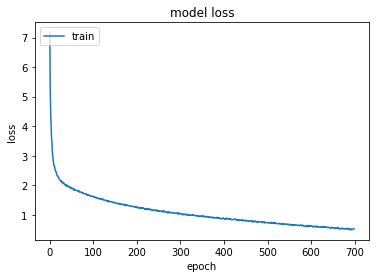

In [13]:
plt.plot(cnnhistory.history['loss'])
#plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

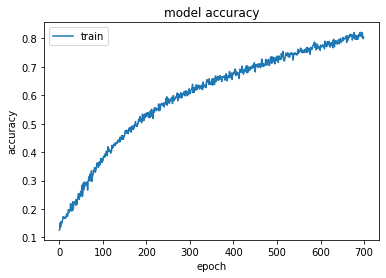

In [14]:
plt.plot(cnnhistory.history['accuracy'])
#plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [15]:
#predictions = model.predict_classes(x_testcnn)
predictions = model.predict(x_testcnn)

In [16]:
predictions

array([[2.2902826e-04, 6.9259721e-01, 1.0837334e-02, ..., 3.1473616e-03,
        3.0755007e-07, 7.1453070e-09],
       [6.7614900e-07, 2.1759880e-07, 1.7828653e-03, ..., 1.8120599e-03,
        2.4830004e-05, 5.3705048e-06],
       [4.1802877e-04, 4.0081402e-04, 1.2989767e-01, ..., 5.2700080e-03,
        8.6128740e-03, 1.4762177e-02],
       ...,
       [8.2957715e-02, 9.1962881e-02, 1.6580220e-01, ..., 3.1617220e-02,
        2.6367807e-01, 1.6994175e-01],
       [4.8215683e-03, 1.3369821e-02, 1.8011914e-01, ..., 1.4190979e-01,
        1.3416386e-01, 4.9859017e-01],
       [1.2907673e-01, 4.7598127e-02, 1.2929189e-01, ..., 9.2537642e-02,
        1.2624538e-01, 1.0245596e-01]], dtype=float32)

In [17]:
y_test

array([1, 4, 4, 1, 1, 2, 7, 2, 3, 2, 3, 4, 4, 7, 3, 6, 0, 4, 2, 6, 6, 3,
       1, 7, 7, 5, 4, 5, 3, 3, 4, 1, 5, 7, 2, 5, 2, 5, 7, 4, 2, 7, 4, 4,
       2, 1, 2, 2, 5, 0, 0, 5, 6, 5, 5, 6, 3, 6, 1, 2, 1, 1, 5, 4, 3, 4,
       3, 1, 5, 6, 5, 1, 2, 6, 2, 3, 7, 4, 3, 1, 2, 4, 5, 6, 2, 5, 3, 7,
       1, 2, 4, 5, 4, 4, 5, 2, 2, 7, 3, 4, 2, 5, 0, 5, 4, 4, 2, 0, 1, 5,
       0, 7, 4, 3, 5, 3, 7, 2, 4, 3, 0, 7, 0, 0, 4, 5, 4, 1, 5, 0, 2, 1,
       3, 6, 6, 2, 6, 6, 0, 5, 6, 5, 1, 2, 2, 1, 2, 4, 3, 0, 0, 1, 5, 5,
       3, 7, 0, 5, 0, 4, 5, 2, 1, 7, 1, 5, 5, 5, 6, 1, 0, 7, 5, 4, 1, 4,
       6, 1, 2, 7, 3, 4, 5, 0, 2, 0, 0, 4, 5, 3, 3, 2, 4, 1, 6, 4, 3, 1,
       7, 0, 1, 5, 0, 4, 5, 4, 2, 3, 1, 7, 5, 4, 1, 3, 1, 6, 2, 4, 1, 3,
       0, 5, 3, 2, 7, 2, 5, 5, 3, 2, 0, 2, 1, 7, 2, 2, 3, 3, 4, 2, 4, 2,
       4, 4, 2, 5, 6, 0, 5, 2, 6, 5, 7, 4, 0, 2, 7, 2, 3, 2, 3, 2, 5, 2,
       0, 7, 3, 0, 2, 6, 5, 0, 6, 1, 1, 6, 6, 4, 6, 5, 1, 4, 2, 4, 2, 1,
       3, 1, 4, 1, 0, 5, 3, 0, 5, 2, 4, 4, 1, 4, 0,

In [18]:
new_Ytest = y_test.astype(int)

In [19]:
new_Ytest

array([1, 4, 4, 1, 1, 2, 7, 2, 3, 2, 3, 4, 4, 7, 3, 6, 0, 4, 2, 6, 6, 3,
       1, 7, 7, 5, 4, 5, 3, 3, 4, 1, 5, 7, 2, 5, 2, 5, 7, 4, 2, 7, 4, 4,
       2, 1, 2, 2, 5, 0, 0, 5, 6, 5, 5, 6, 3, 6, 1, 2, 1, 1, 5, 4, 3, 4,
       3, 1, 5, 6, 5, 1, 2, 6, 2, 3, 7, 4, 3, 1, 2, 4, 5, 6, 2, 5, 3, 7,
       1, 2, 4, 5, 4, 4, 5, 2, 2, 7, 3, 4, 2, 5, 0, 5, 4, 4, 2, 0, 1, 5,
       0, 7, 4, 3, 5, 3, 7, 2, 4, 3, 0, 7, 0, 0, 4, 5, 4, 1, 5, 0, 2, 1,
       3, 6, 6, 2, 6, 6, 0, 5, 6, 5, 1, 2, 2, 1, 2, 4, 3, 0, 0, 1, 5, 5,
       3, 7, 0, 5, 0, 4, 5, 2, 1, 7, 1, 5, 5, 5, 6, 1, 0, 7, 5, 4, 1, 4,
       6, 1, 2, 7, 3, 4, 5, 0, 2, 0, 0, 4, 5, 3, 3, 2, 4, 1, 6, 4, 3, 1,
       7, 0, 1, 5, 0, 4, 5, 4, 2, 3, 1, 7, 5, 4, 1, 3, 1, 6, 2, 4, 1, 3,
       0, 5, 3, 2, 7, 2, 5, 5, 3, 2, 0, 2, 1, 7, 2, 2, 3, 3, 4, 2, 4, 2,
       4, 4, 2, 5, 6, 0, 5, 2, 6, 5, 7, 4, 0, 2, 7, 2, 3, 2, 3, 2, 5, 2,
       0, 7, 3, 0, 2, 6, 5, 0, 6, 1, 1, 6, 6, 4, 6, 5, 1, 4, 2, 4, 2, 1,
       3, 1, 4, 1, 0, 5, 3, 0, 5, 2, 4, 4, 1, 4, 0,

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (16,16), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [20]:
preds1=predictions.argmax(axis=1)


In [21]:
preds1

array([1, 4, 4, 1, 1, 2, 7, 2, 5, 2, 3, 3, 4, 5, 3, 6, 4, 4, 2, 6, 7, 7,
       1, 7, 7, 5, 4, 5, 3, 3, 4, 1, 5, 3, 2, 5, 2, 3, 7, 4, 5, 7, 4, 4,
       2, 3, 1, 0, 2, 0, 0, 4, 6, 3, 3, 2, 1, 6, 1, 2, 1, 3, 5, 4, 3, 4,
       5, 1, 3, 6, 5, 2, 2, 0, 4, 3, 7, 4, 5, 6, 2, 2, 5, 6, 7, 5, 3, 7,
       1, 4, 4, 5, 4, 4, 3, 2, 2, 7, 3, 4, 2, 5, 0, 5, 4, 1, 2, 0, 1, 5,
       3, 7, 4, 3, 5, 3, 7, 1, 4, 3, 0, 6, 1, 0, 4, 5, 4, 1, 5, 0, 2, 6,
       6, 7, 6, 2, 7, 2, 6, 5, 6, 5, 2, 2, 2, 1, 2, 4, 3, 5, 5, 1, 4, 5,
       3, 7, 3, 5, 0, 4, 5, 2, 1, 7, 1, 5, 5, 2, 7, 1, 0, 7, 5, 6, 1, 4,
       6, 1, 7, 7, 3, 4, 5, 7, 2, 0, 3, 6, 5, 5, 4, 2, 4, 1, 6, 4, 6, 3,
       1, 0, 6, 5, 0, 4, 3, 4, 2, 3, 1, 7, 5, 5, 1, 3, 1, 6, 2, 4, 1, 6,
       1, 3, 5, 2, 7, 2, 2, 5, 3, 4, 0, 2, 1, 7, 2, 5, 1, 1, 4, 2, 4, 1,
       4, 4, 2, 5, 6, 0, 5, 2, 7, 5, 7, 4, 0, 2, 7, 2, 3, 2, 3, 2, 2, 2,
       3, 7, 3, 0, 2, 7, 2, 0, 7, 1, 1, 7, 6, 4, 6, 5, 1, 4, 2, 4, 2, 1,
       4, 2, 4, 4, 0, 5, 3, 0, 5, 2, 4, 4, 1, 4, 0,

In [22]:
abc = preds1.astype(int).flatten()

In [23]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(new_Ytest, abc) 
c

array([[28,  4,  0,  5,  2,  4,  2,  1],
       [ 2, 57,  5,  3,  1,  0,  3,  0],
       [ 1,  3, 67,  0,  4,  4,  0,  4],
       [ 2,  4,  1, 41,  3,  6,  3,  1],
       [ 0,  1,  1,  1, 69,  1,  4,  0],
       [ 1,  0,  7, 11,  2, 59,  0,  1],
       [ 1,  0,  3,  0,  0,  1, 20,  8],
       [ 0,  3,  1,  1,  3,  1,  1, 29]])

In [24]:
y_test

array([1, 4, 4, 1, 1, 2, 7, 2, 3, 2, 3, 4, 4, 7, 3, 6, 0, 4, 2, 6, 6, 3,
       1, 7, 7, 5, 4, 5, 3, 3, 4, 1, 5, 7, 2, 5, 2, 5, 7, 4, 2, 7, 4, 4,
       2, 1, 2, 2, 5, 0, 0, 5, 6, 5, 5, 6, 3, 6, 1, 2, 1, 1, 5, 4, 3, 4,
       3, 1, 5, 6, 5, 1, 2, 6, 2, 3, 7, 4, 3, 1, 2, 4, 5, 6, 2, 5, 3, 7,
       1, 2, 4, 5, 4, 4, 5, 2, 2, 7, 3, 4, 2, 5, 0, 5, 4, 4, 2, 0, 1, 5,
       0, 7, 4, 3, 5, 3, 7, 2, 4, 3, 0, 7, 0, 0, 4, 5, 4, 1, 5, 0, 2, 1,
       3, 6, 6, 2, 6, 6, 0, 5, 6, 5, 1, 2, 2, 1, 2, 4, 3, 0, 0, 1, 5, 5,
       3, 7, 0, 5, 0, 4, 5, 2, 1, 7, 1, 5, 5, 5, 6, 1, 0, 7, 5, 4, 1, 4,
       6, 1, 2, 7, 3, 4, 5, 0, 2, 0, 0, 4, 5, 3, 3, 2, 4, 1, 6, 4, 3, 1,
       7, 0, 1, 5, 0, 4, 5, 4, 2, 3, 1, 7, 5, 4, 1, 3, 1, 6, 2, 4, 1, 3,
       0, 5, 3, 2, 7, 2, 5, 5, 3, 2, 0, 2, 1, 7, 2, 2, 3, 3, 4, 2, 4, 2,
       4, 4, 2, 5, 6, 0, 5, 2, 6, 5, 7, 4, 0, 2, 7, 2, 3, 2, 3, 2, 5, 2,
       0, 7, 3, 0, 2, 6, 5, 0, 6, 1, 1, 6, 6, 4, 6, 5, 1, 4, 2, 4, 2, 1,
       3, 1, 4, 1, 0, 5, 3, 0, 5, 2, 4, 4, 1, 4, 0,

In [ ]:
# Visualize Confusion Matrix 

# class_names = ['male_angry', 'male_calm', 'male_fearful', 'male_happy', 'male_sad']
# class_names = ['female_angry', 'female_calm', 'female_fearful', 'female_happy', 'female_sad']
# class_names = ['male_negative', 'male_neutral', 'male_positive']
#class_names = ['male_negative', 'male_positive']
#class_names = ['female_angry', 'female_calm', 'female_fearful', 'female_happy', 'female_sad', 'female_surprised', 'female_disgust', 'female_neutral',
               #'male_angry', 'male_calm', 'male_fearful', 'male_happy', 'male_sad' , 'male_surprised', 'male_disgust' , 'male_neutral']
class_names = ['angry', 'calm', 'fearful', 'happy', 'sad', 'neutral']

print_confusion_matrix(c, class_names)

NameError: ignored

In [25]:
model.save('/content/drive/My Drive/graduation project/audio/paper_code/orignal_1_700 epocs_no_valid')
print("MODEL SAVED")

INFO:tensorflow:Assets written to: /content/drive/My Drive/graduation project/audio/paper_code/orignal_1_700 epocs_no_valid/assets
MODEL SAVED


In [27]:
new_model=keras.models.load_model('/content/drive/My Drive/graduation project/audio/paper_code/orignal_1_700 epocs_no_valid')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 40, 128)           1152      
                                                                 
 activation_5 (Activation)   (None, 40, 128)           0         
                                                                 
 dropout_2 (Dropout)         (None, 40, 128)           0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 8, 128)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 8, 256)            262400    
                                                                 
 activation_6 (Activation)   (None, 8, 256)            0         
                                                      

In [28]:
predictions = new_model.predict(x_testcnn)

In [29]:
predictions

array([[2.2902826e-04, 6.9259721e-01, 1.0837334e-02, ..., 3.1473616e-03,
        3.0755007e-07, 7.1453070e-09],
       [6.7614900e-07, 2.1759880e-07, 1.7828653e-03, ..., 1.8120599e-03,
        2.4830004e-05, 5.3705048e-06],
       [4.1802877e-04, 4.0081402e-04, 1.2989767e-01, ..., 5.2700080e-03,
        8.6128740e-03, 1.4762177e-02],
       ...,
       [8.2957715e-02, 9.1962881e-02, 1.6580220e-01, ..., 3.1617220e-02,
        2.6367807e-01, 1.6994175e-01],
       [4.8215683e-03, 1.3369821e-02, 1.8011914e-01, ..., 1.4190979e-01,
        1.3416386e-01, 4.9859017e-01],
       [1.2907673e-01, 4.7598127e-02, 1.2929189e-01, ..., 9.2537642e-02,
        1.2624538e-01, 1.0245596e-01]], dtype=float32)

In [30]:
loss, acc =new_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

16/16 [==============================] - 1s 5ms/step - loss: 0.7824 - accuracy: 0.7536
Restored model, accuracy: 75.36%


In [31]:
loss, acc =new_model.evaluate(X_train, y_train)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

62/62 [==============================] - 1s 10ms/step - loss: 0.4327 - accuracy: 0.9041
Restored model, accuracy: 90.41%
